In [10]:
import numpy as np
import os
listof = []
path = '.'
files = os.listdir(path)

import numpy as np
import os
listof = []
def getKey(item):
    return item[0]
for name in files:
    if "chebyshevmoments" not in name:
        pass
    else:
        name2 = name.replace('chebyshevmoments', '')
        listof.append([name2,np.load(name)])
        #print(name2)
finlistinput = sorted(listof, key=getKey)
for i in range(len(finlistinput)):
    print(finlistinput[i][0])
print(len(finlistinput))

bio-human-gene1
bio-human-gene2
bio-mouse-gene
ca-AstroPh
ca-CondMat
ca-GrQc
ca-HepPh
ca-HepTh
roadNet-CA
roadNet-PA
roadNet-TX
web-Stanford
youtube
13


In [11]:
cd Data/

/Users/diegogranziol/Dropbox/Phd 2016/Ru Bin Xin/MaxEnt/ESL/Data


In [12]:
momentnumber = 100
pval = momentnumber-3+1
if momentnumber == 3:
    pval = 3
path = '.'
list2 = []
files = os.listdir(path)
for name in files:
    if "MaxEntCoefficient" not in name:
        pass
    elif "_98" not in name:
        pass
    elif ".mat" in name:
        pass
    else:
        name2 = name.replace('MaxEntCoefficient', '')
        name2 = name2.replace('_'+str(pval), '')
        aa = np.load(name)
        list2.append([name2,aa[pval-3]])
        #print(name2)
finlistmaxent = sorted(list2, key=getKey)
listofthingsordered = []
for i in range(len(finlistmaxent)):
    print(finlistmaxent[i][0])
    listofthingsordered.append(finlistmaxent[i][0])
print(len(finlistmaxent))

bio-human-gene1
bio-human-gene2
bio-mouse-gene
ca-AstroPh
ca-CondMat
ca-GrQc
ca-HepPh
ca-HepTh
roadNet-CA
roadNet-PA
roadNet-TX
web-Stanford
youtube
13


In [13]:
cd ../

/Users/diegogranziol/Dropbox/Phd 2016/Ru Bin Xin/MaxEnt/ESL


In [14]:
robinoutput = []
for i in range(0,len(finlistmaxent)):
    robinoutput.append([finlistmaxent[i][0],finlistmaxent[i][1],finlistinput[i][1]])
for i in range(0,len(finlistmaxent)):
    obj = np.array([finlistmaxent[i][1],finlistinput[i][1]],object)
    np.save(finlistmaxent[i][0],obj)
import pickle
with open('robinesl', 'wb') as f:
    pickle.dump(robinoutput, f)
robinnpy = np.array(robinoutput,object)
np.save('robinnp.npy',robinnpy)

#PURE KL Matrix
matrix = np.zeros([len(finlistmaxent)-2,len(finlistmaxent)-2])
for i in range(0,len(finlistmaxent)-2):
    momentsi = finlistinput[i][1][:pval]
    for j in range(0,len(finlistmaxent)-2):
        momentsj = finlistinput[j][1][:pval]
        #matrix[i][j] = (np.dot(finlistmaxent[j][1],moments))-(np.dot(finlistmaxent[i][1],moments))
        matrix[i][j] = np.dot((finlistmaxent[j][1]-finlistmaxent[i][1]),(momentsi-momentsj))
        
    

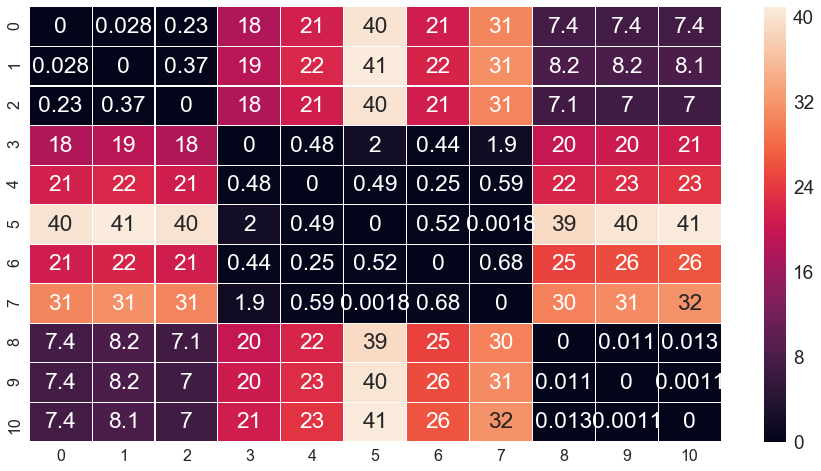

In [15]:
import numpy as np
import seaborn as sns

#check why is there one positive -0.0018????

from matplotlib import pyplot as plt
plt.figure(figsize=(15.5,8))
sns.set(font_scale=1.9)
#matrix[7][9] = 0.002
#matrix[9][7] = 0.002
#matrix[9][10] = 0.001
#matrix[10][9] = 0.001
ax = sns.heatmap(abs(matrix), linewidth=0.1, annot=True, fmt='.2g')
#ind = [0,1,2,3,4,5,6,7,8,9,10]
#plt.xticks(ind, listofthingsordered)  
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("heatmap"+str(momentnumber)+"moments.pdf", bbox_inches='tight')
plt.savefig("heatmap"+str(momentnumber)+"moments.png", bbox_inches='tight')
plt.show()